In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings("ignore")
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
neg,avs,avm,avf,ri,rd = np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8))
for m in range(8):
    for n in range(8):
        dnm = np.load('data/k4_v/m' + str(m+5) + '_n' + str(n+5) + '.npy')
        diff = dnm[:,0] - dnm[:,2]
        neg[m,n] = np.sum(diff<0)
        avs[m,n] = np.mean(dnm[:,0])
        avm[m,n] = np.mean(dnm[:,1])
        avf[m,n] = np.mean(dnm[:,2])
        ri[m,n] = (avs[m,n] - avf[m,n]) / avs[m,n]
        rd[m,n] = (avm[m,n] - avs[m,n]) / avs[m,n]
        
np.sum(neg)

100.0

0.08033116142566073

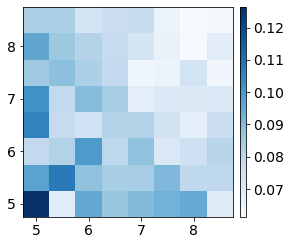

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
im = ax.imshow(rd, cmap='Blues', vmin=np.min(rd), vmax=np.max(rd), origin='lower');
xtk = 4+np.arange(0,8)
ax.set_xticklabels(xtk)
ax.set_yticklabels(xtk);
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax);
np.mean(rd)

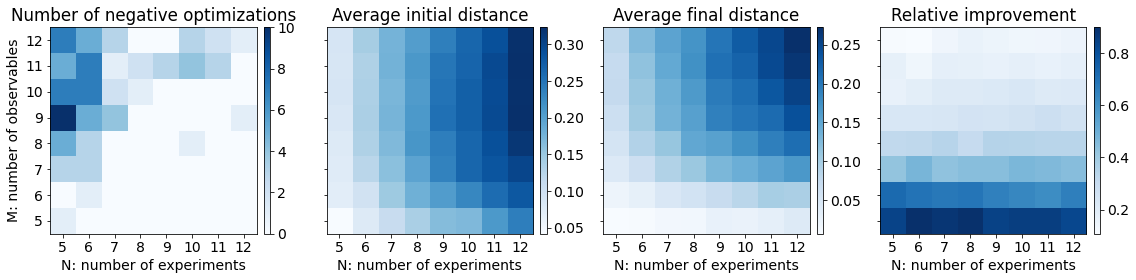

In [4]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=np.min(neg), vmax=np.max(neg), origin='lower')
ax[0].set_title('Number of negative optimizations')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=np.min(avs), vmax=np.max(avs), origin='lower')
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=np.min(avf), vmax=np.max(avf), origin='lower')
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=np.min(ri), vmax=np.max(ri), origin='lower')
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('M: number of observables');
iml = [im0,im1,im2,im3]
xtk = 5+np.arange(0,8)
for i in range(4):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(xtk)
    a.set_yticklabels(xtk);
    a.set_xlabel('N: number of experiments')
    #a.scatter(xind,yind, marker='.', s=6, color='k')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()

In [5]:
#fig.savefig('k4-res.jpg', dpi=100)

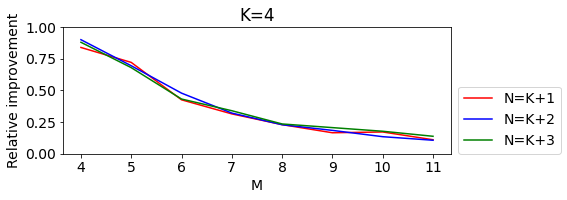

In [6]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
ax.plot(4+np.arange(0,8), ri[:,0], label='N=K+1', color = 'r')
ax.plot(4+np.arange(0,8), ri[:,1], label='N=K+2', color = 'b')
ax.plot(4+np.arange(0,8), ri[:,2], label='N=K+3', color = 'g')
ax.legend(loc=(1.02,0))
ax.set_ylim(0,1);
ax.set_ylabel('Relative improvement');
ax.set_xlabel('M');
ax.set_title('K=4')
fig.tight_layout()

In [7]:
fig.savefig('figures/k4-lines.pdf')

In [8]:
rik4 = np.mean(ri, axis=1)
rik4

array([0.86208762, 0.66810678, 0.45194936, 0.33101932, 0.24897499,
       0.20433115, 0.1680616 , 0.13721297])

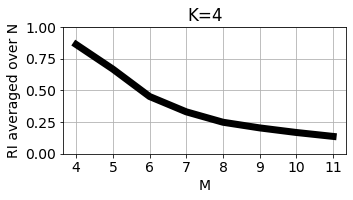

In [9]:
xtk = 4+np.arange(0,8)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(xtk, np.mean(ri, axis=1), color = 'k', lw=7)
ax.set_ylim(0,1);
ax.set_ylabel('RI averaged over N');
ax.set_xlabel('M');
ax.set_title('K=4')
ax.set_xticks(xtk)
ax.grid(True)
fig.tight_layout()

In [10]:
np.mean(ri, axis=1)

array([0.86208762, 0.66810678, 0.45194936, 0.33101932, 0.24897499,
       0.20433115, 0.1680616 , 0.13721297])

In [11]:
np.save('data/ri/ri4.npy', ri)
print(ri)

[[0.83885256 0.90021917 0.87972377 0.89475884 0.84204929 0.85679636
  0.85595477 0.82834623]
 [0.72099283 0.69454273 0.67963599 0.68711726 0.65267185 0.63611854
  0.61658701 0.65718803]
 [0.42584746 0.47856785 0.43205022 0.44771357 0.44758767 0.4714468
  0.46321715 0.44916415]
 [0.31478208 0.32135293 0.33985207 0.3043981  0.34798023 0.3452051
  0.33721461 0.33736945]
 [0.22999134 0.22940914 0.23540232 0.25255885 0.24904832 0.25704203
  0.2800209  0.25832699]
 [0.16596462 0.18473146 0.20656891 0.20897326 0.21728821 0.22967162
  0.20873661 0.2127145 ]
 [0.1721687  0.13497511 0.17785389 0.17456079 0.16558764 0.17542474
  0.16635667 0.17756523]
 [0.11089026 0.1069352  0.13819966 0.16236801 0.14938883 0.13784539
  0.1401456  0.15193081]]
